# KCl example

#### Import required packages

In [1]:
%matplotlib inline
from mantid.simpleapi import *
import matplotlib.pyplot as plt
from mantid import plots

Set a larger default figure size

In [168]:
plt.rcParams['figure.figsize'] = [12.5, 10]

#### Set IPTS number

In [3]:
ipts = 7776

#### Load data and vanadium
###### Data is loaded into a MDHistoWorkspace that have dimensions corresponding to x pixels, y pixels and sample rotation

In [4]:
LoadWANDSCD(IPTS=ipts, RunNumbers=26509, OutputWorkspace='norm',Grouping='4x4') # Vanadium
LoadWANDSCD(IPTS=ipts, RunNumbers='27976-29776', OutputWorkspace='data',Grouping='4x4')

MDHistoWorkspace
Title: 
Dim 0: (y) 0.5 to 128.5 in 128 bins
Dim 1: (x) 0.5 to 960.5 in 960 bins
Dim 2: (scanIndex) 0.5 to 1801.5 in 1801 bins

Inelastic: ki-kf
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: /HFIR/HB2C/IPTS-7776/nexus/HB2C_27976.nxs.h5

Parameters from: /home/rwp/mantid/instrument/WAND_Parameters.xml
Run start: 2018-May-07 22:24:49
Run end:  not available
Sample: a 6.3, b 6.3, c 6.3; alpha 90, beta 90, gamma 90


##### Integrate out a slice of data in the y (verticle) pixels. Only 2D can be plotted using `mantid` projections.

In [5]:
data_slice = IntegrateMDHistoWorkspace('data',P2Bin=[0,1801])

#### plot the data slice

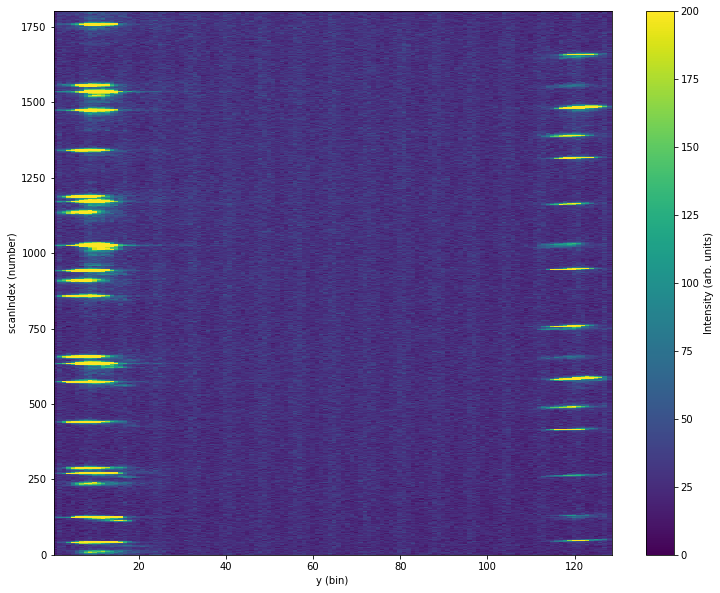

In [169]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(data_slice, vmax=200, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

In [10]:
hk0_slice = IntegrateMDHistoWorkspace('data',P1Bin=[0,20])

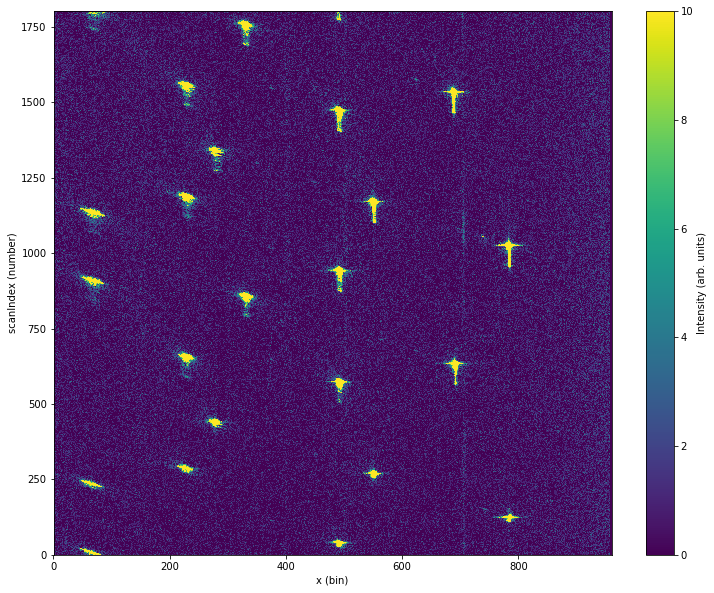

In [170]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(hk0_slice, vmax=10, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

In [13]:
hk1_slice = IntegrateMDHistoWorkspace('data',P1Bin=[108,128])

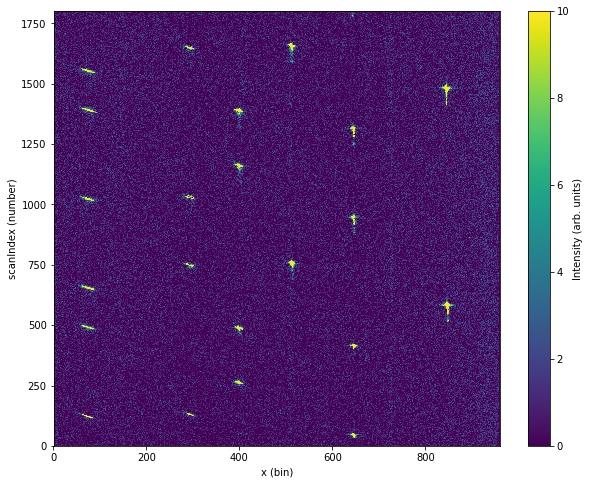

In [32]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(hk1_slice, vmax=10, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

#### Convert the data to Q space

In [46]:
ConvertWANDSCDtoQ(InputWorkspace='data',
                  NormalisationWorkspace='norm',
                  OutputWorkspace='Q',
                  BinningDim1='-2.02,1.02,76')

MDHistoWorkspace
Title: 
Dim 0: (Q_sample_x) -8.02 to 8.02 in 401 bins
Dim 1: (Q_sample_y) -2.02 to 1.02 in 76 bins
Dim 2: (Q_sample_z) -8.02 to 8.02 in 401 bins

Inelastic: ki-kf
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: /HFIR/HB2C/IPTS-7776/nexus/HB2C_27976.nxs.h5

Parameters from: /home/rwp/mantid/instrument/WAND_Parameters.xml
Run start: 2018-May-07 22:24:49
Run end:  not available
Sample: a 6.3, b 6.3, c 6.3; alpha 90, beta 90, gamma 90


In [57]:
Q_0 = IntegrateMDHistoWorkspace('Q',P2Bin=[-0.04,0.04])

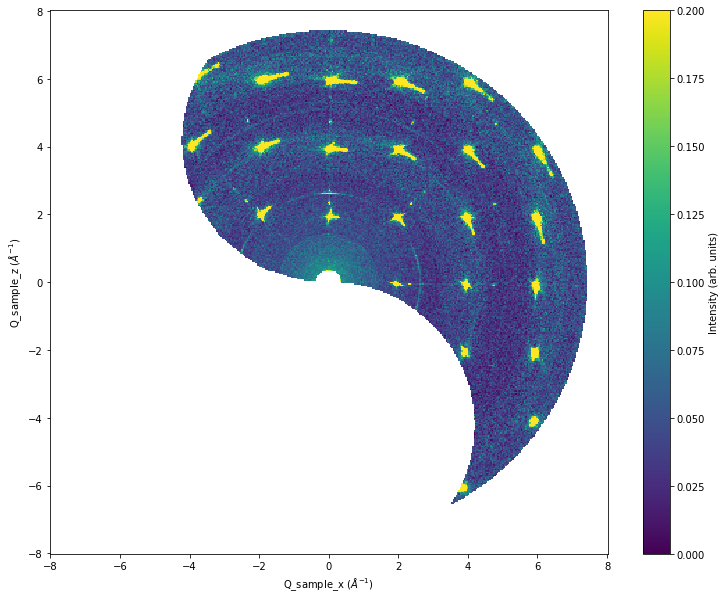

In [171]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(mtd['Q_0'], vmax=0.2, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

In [74]:
Q_1 = IntegrateMDHistoWorkspace('Q',P2Bin=[-1.02,-0.94])

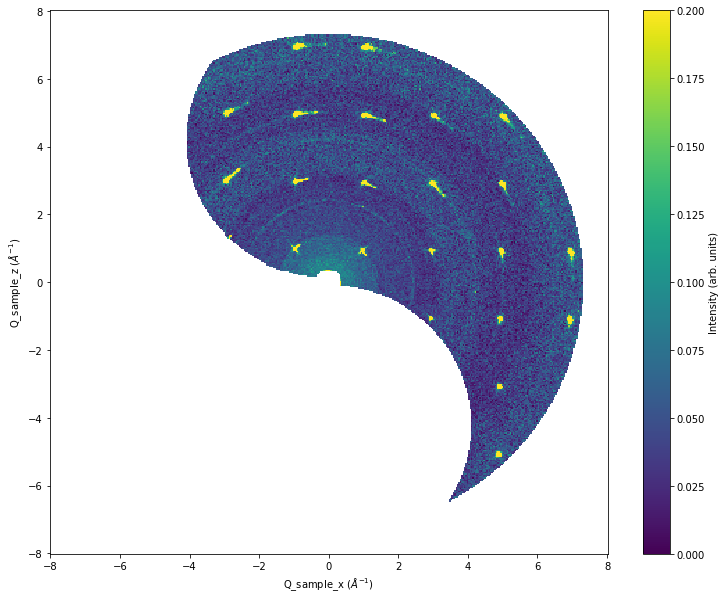

In [172]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(mtd['Q_1'], vmax=0.2, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

### Find peaks and UB

In [215]:
FindPeaksMD(InputWorkspace='Q',
            PeakDistanceThreshold=1.5,
            MaxPeaks=100, 
            CalculateGoniometerForCW=True, 
            Wavelength=1.488, 
            OutputWorkspace='peaks')

PeaksWorkspace
Columns: 18
Rows: 51
21 kB
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: /HFIR/HB2C/IPTS-7776/nexus/HB2C_27976.nxs.h5

Parameters from: /home/rwp/mantid/instrument/WAND_Parameters.xml
Run start: 2018-May-07 22:24:49
Run end:  not available
Sample: a 6.3, b 6.3, c 6.5; alpha 90, beta 91, gamma 90
Inelastic: ki-kf

In [216]:
FindUBUsingFFT('peaks',
              MinD=3,
              MaxD=8)

In [217]:
peaks = mtd['peaks']
for n in range(peaks.getNumberPeaks()):
    p = peaks.getPeak(n)
    print(n, p.getQSampleFrame())

(0, [-1.96021,-0.0380204,2.00038])
(1, [0.0397261,-0.0380248,1.95904])
(2, [0.0396812,0.000498458,3.95942])
(3, [-1.91998,0.000498457,4.00025])
(4, [1.95904,-0.0380248,-0.0397427])
(5, [4.00026,0.000498457,1.91996])
(6, [2.00022,0.000498457,1.9601])
(7, [3.95942,0.000498458,-0.0396978])
(8, [2.04044,0.000498457,3.92026])
(9, [0.0804338,0.000498458,5.96042])
(10, [-0.961153,-0.995885,1.0001])
(11, [-3.92003,-0.0380172,4.04011])
(12, [3.92025,0.000498457,-2.04045])
(13, [3.99946,0.000498457,3.91996])
(14, [2.07919,0.000498456,5.95966])
(15, [5.96042,0.000498458,-0.0804493])
(16, [5.99994,0.000498456,1.92002])
(17, [-1.92003,0.000498456,5.99994])
(18, [1.00011,-0.995887,0.961146])
(19, [5.95965,0.000498456,-2.0792])
(20, [4.07889,0.000498458,5.92004])
(21, [2.99872,-0.956952,2.92036])
(22, [5.92004,0.000498458,-4.07889])
(23, [1.03995,-0.996626,2.9612])
(24, [-0.960891,-0.996205,3.0002])
(25, [-2.92097,-0.995789,2.9997])
(26, [2.96079,-0.997505,0.96056])
(27, [6.03911,0.000498458,3.92041]

In [218]:
ShowPossibleCells('peaks')

5

In [219]:
SelectCellOfType('peaks',CellType='Orthorhombic',Centering='F',Apply=True)

SelectCellOfType_returns(NumIndexed=45, AverageError=0.017393226908154424)

In [220]:
ShowPossibleCells('peaks')

8

In [221]:
SelectCellOfType('peaks',CellType='Cubic',Centering='P',Apply=True)

SelectCellOfType_returns(NumIndexed=45, AverageError=0.01739322690815436)

#### Set UB and convert to HKL

If you used the sample alignment tool then the UB will already be on the workspace and you dont need to set it

In [222]:
ConvertWANDSCDtoQ(InputWorkspace='data',
                  UBWorkspace='peaks',
                  NormalisationWorkspace='norm',
                  OutputWorkspace='HKL',
                  KeepTemporaryWorkspaces=True,
                  Frame='HKL',
                  BinningDim0='-10,10,300',
                  BinningDim1='-10,10,300',
                  BinningDim2='-10,10,300')

MDHistoWorkspace
Title: 
Dim 0: ([H,0,0]) -10 to 10 in 300 bins
Dim 1: ([0,K,0]) -10 to 10 in 300 bins
Dim 2: ([0,0,L]) -10 to 10 in 300 bins

Inelastic: ki-kf
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: /HFIR/HB2C/IPTS-7776/nexus/HB2C_27976.nxs.h5

Parameters from: /home/rwp/mantid/instrument/WAND_Parameters.xml
Run start: 2018-May-07 22:24:49
Run end:  not available
Sample: a 6.3, b 6.3, c 6.5; alpha 89, beta 90, gamma 90


In [223]:
HK0 = IntegrateMDHistoWorkspace('HKL',P3Bin=[-0.02,0.02])
HK0

MDHistoWorkspace
Title: 
Dim 0: ([H,0,0]) -10 to 10 in 300 bins
Dim 1: ([0,K,0]) -10 to 10 in 300 bins
Dim 2: ([0,0,L]) -0.02 to 0.02 in 1 bins

Inelastic: ki-kf


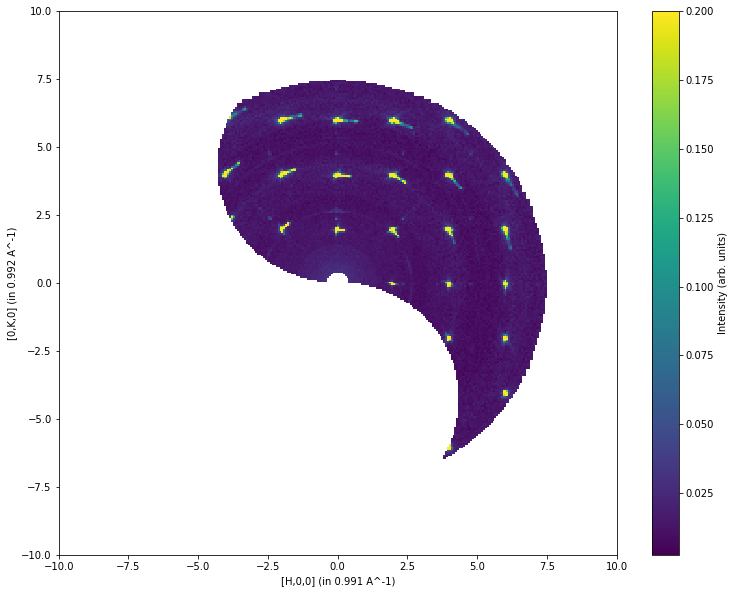

In [224]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(mtd['HK0'], vmax=0.2, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

In [225]:
HK1 = IntegrateMDHistoWorkspace('HKL',P3Bin=[0.98,1.02])
HK1

MDHistoWorkspace
Title: 
Dim 0: ([H,0,0]) -10 to 10 in 300 bins
Dim 1: ([0,K,0]) -10 to 10 in 300 bins
Dim 2: ([0,0,L]) 0.98 to 1.02 in 1 bins

Inelastic: ki-kf


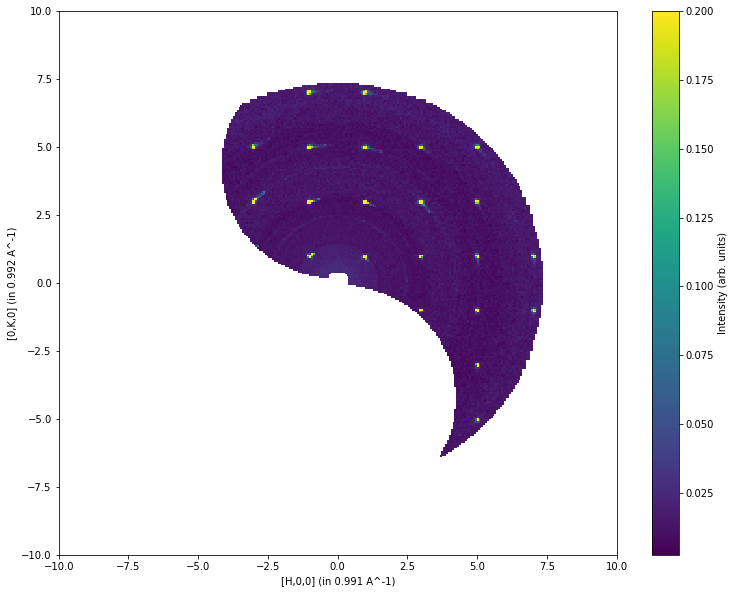

In [226]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(mtd['HK1'], vmax=0.2, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

## See also

* [LoadWANDSCD](http://docs.mantidproject.org/nightly/algorithms/LoadWANDSCD.html)
* [ConvertWANDSCDtoQ](http://docs.mantidproject.org/nightly/algorithms/ConvertWANDSCDtoQ.html)
* [IntegrateMDHistoWorkspace](http://docs.mantidproject.org/nightly/algorithms/IntegrateMDHistoWorkspace.html)
* [Introduction to Matplotlib in Mantid](http://docs.mantidproject.org/nightly/plotting/)
* [mantid.plots](http://docs.mantidproject.org/nightly/api/python/mantid/plots/)